# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
baseurl = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
baseurl = f"{baseurl}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
# city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
maxtemp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
date_list=[]

#  initialize the counter 
setCount = 1
recordCount=1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
# set counters      
    if recordCount == 51:
        recordCount = 1
        setCount = setCount + 1
        
     # Get the JSON response from the OpenWeather API
    url =f"{baseurl}{city}"
    # print(url)
    weather_response = requests.get(url)
    # print(weather_response)
    # check the response code is 200 
    if weather_response.status_code == 200:        
        weather_json = weather_response.json()
        # try block for exceptions 
        try:
            city_id = weather_json['id']
            city_id_list.append(city_id)
            
            date = weather_json['dt']
            date_list.append(date)

            
            city_name = weather_json['name']
            city_name_list.append(city_name)

            country_name = weather_json['sys']['country']
            country_list.append(country_name)

            lng = weather_json['coord']['lon']
            lng_list.append(lng)

            lat = weather_json['coord']['lat']
            lat_list.append(lat)

            temp = weather_json['main']['temp_max']
            maxtemp_list.append(temp)

            humidity = weather_json['main']['humidity']
            humidity_list.append(humidity)

            clouds = weather_json['clouds']['all']
            clouds_list.append(clouds)

            wind_speed = weather_json['wind']['speed']
            wind_speed_list.append(wind_speed)
            
            print(f"Processing Record {recordCount} of Set {setCount} | {city}")
            recordCount = recordCount + 1
            
        except:
            print("City not found. Skipping...")
        #----------End Try          
    #----------End If

# Convert the data into a dataframe

cities_df = pd.DataFrame({
            "City": city_name_list, 
            "Lat": lat_list, 
            "Lng": lng_list,
            "Max Temp": maxtemp_list, 
            "Humidity": humidity_list, 
            "Cloudiness": clouds_list,
            "Wind Speed": wind_speed_list,
            "Country": country_list, 
            "Date": date_list})



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | tautira
Processing Record 4 of Set 1 | okhotsk
Processing Record 5 of Set 1 | punta alta
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | iwanai
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | presidencia roque saenz pena
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | barra do corda
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | padang
Processing Record 20 of Set 1 | cockburn town
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | brae
Processing Record 23 of Set 1

Processing Record 48 of Set 4 | hutang
Processing Record 49 of Set 4 | haines junction
Processing Record 50 of Set 4 | ixtapa
Processing Record 1 of Set 5 | salalah
Processing Record 2 of Set 5 | galeana
Processing Record 3 of Set 5 | sambava
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | yerofey pavlovich
Processing Record 8 of Set 5 | east london
Processing Record 9 of Set 5 | benguela
Processing Record 10 of Set 5 | kedrovyy
Processing Record 11 of Set 5 | isangel
Processing Record 12 of Set 5 | taseyevo
Processing Record 13 of Set 5 | maridi
Processing Record 14 of Set 5 | porto de moz
Processing Record 15 of Set 5 | bartica
Processing Record 16 of Set 5 | meulaboh
Processing Record 17 of Set 5 | santa rosa
Processing Record 18 of Set 5 | arlit
Processing Record 19 of Set 5 | buala
Processing Record 20 of Set 5 | nishihara
Processing Record 21 of Set 5 | prieska
Processin

Processing Record 47 of Set 8 | suksun
Processing Record 48 of Set 8 | sisimiut
Processing Record 49 of Set 8 | hofn
Processing Record 50 of Set 8 | grand bend
Processing Record 1 of Set 9 | ocho rios
Processing Record 2 of Set 9 | bonthe
Processing Record 3 of Set 9 | nichinan
Processing Record 4 of Set 9 | yumen
Processing Record 5 of Set 9 | roald
Processing Record 6 of Set 9 | richards bay
Processing Record 7 of Set 9 | rafai
Processing Record 8 of Set 9 | saint-joseph
Processing Record 9 of Set 9 | najran
Processing Record 10 of Set 9 | maneromango
Processing Record 11 of Set 9 | pa sang
Processing Record 12 of Set 9 | cururupu
Processing Record 13 of Set 9 | puerto princesa
Processing Record 14 of Set 9 | eldorado
Processing Record 15 of Set 9 | pavlovka
Processing Record 16 of Set 9 | port hardy
Processing Record 17 of Set 9 | merauke
Processing Record 18 of Set 9 | nioki
Processing Record 19 of Set 9 | barabinsk
Processing Record 20 of Set 9 | christchurch
Processing Record 21 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
cities_df.to_csv('../output_data/cities.csv')

In [24]:

cities_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,52.48,85,83,1.77,NZ,1627446024
1,Busselton,-33.6500,115.3333,60.04,69,54,19.71,AU,1627446406
2,Tautira,-17.7333,-149.1500,78.82,70,79,7.87,PF,1627446406
3,Okhotsk,59.3833,143.3000,62.67,79,57,13.09,RU,1627446407
4,Punta Alta,-38.8759,-62.0736,43.43,76,91,19.15,AR,1627446352


In [25]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,20.183197,15.177342,69.084691,71.323024,52.723368,7.732852,1.627446e+09
std,33.274244,89.419278,14.296988,19.602824,38.976679,5.219257,1.037380e+02
min,-54.800000,-179.166700,31.570000,12.000000,0.000000,0.000000,1.627446e+09
25%,-6.368075,-61.617425,59.837500,59.250000,10.250000,3.537500,1.627446e+09
50%,22.426100,17.308300,70.110000,75.000000,57.000000,6.825000,1.627446e+09
75%,50.240225,94.898175,79.762500,87.000000,92.000000,10.390000,1.627447e+09
max,78.218600,179.316700,98.650000,100.000000,100.000000,27.940000,1.627447e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,20.183197,15.177342,69.084691,71.323024,52.723368,7.732852,1.627446e+09
std,33.274244,89.419278,14.296988,19.602824,38.976679,5.219257,1.037380e+02
min,-54.800000,-179.166700,31.570000,12.000000,0.000000,0.000000,1.627446e+09
25%,-6.368075,-61.617425,59.837500,59.250000,10.250000,3.537500,1.627446e+09
50%,22.426100,17.308300,70.110000,75.000000,57.000000,6.825000,1.627446e+09
75%,50.240225,94.898175,79.762500,87.000000,92.000000,10.390000,1.627447e+09
max,78.218600,179.316700,98.650000,100.000000,100.000000,27.940000,1.627447e+09


In [31]:
#  Get the indices of cities that have humidity over 100%.
# none of cities have humidity over 100%

In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# none of cities have humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

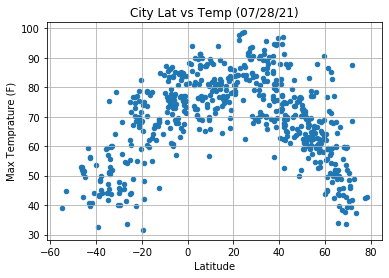

In [36]:
cities_df.plot.scatter('Lat', 'Max Temp', grid=True, title='City Latitude vs Max Temprature (%s)' % time.strftime('%x'))
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Humidity Plot

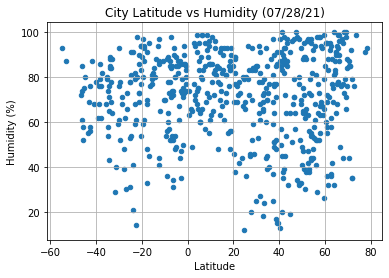

In [37]:
cities_df.plot.scatter('Lat', 'Humidity', grid=True, title='City Latitude vs Humidity (%s)' % time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

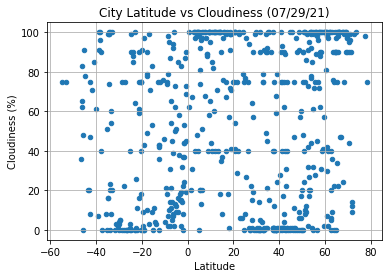

In [40]:
cities_df.plot.scatter('Lat', 'Cloudiness', grid=True, title='City Latitude vs Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

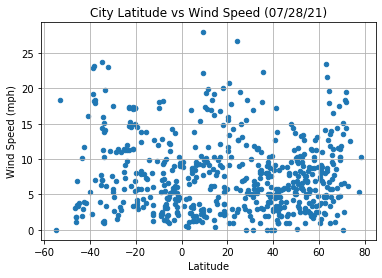

In [39]:
cities_df.plot.scatter('Lat', 'Wind Speed', grid=True, title='City Latitude vs Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

## Linear Regression

In [94]:
# Create Northern and Southern Hemisphere DataFrames
nhemis= cities_df['Lat'] > 0
nhemis_df = cities_df[nhemis]
shemis_df = cities_df[~nhemis]

# shemis=cities_df['Lat']<0
# shemis_df = cities_df[shemis]
# print(shemis)
# print(str(len(nhemis_df)) + ","  + str(len(shemis_df)))
nhemis_df.head()
shemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,52.48,85,83,1.77,NZ,1627446024
1,Busselton,-33.6500,115.3333,60.04,69,54,19.71,AU,1627446406
2,Tautira,-17.7333,-149.1500,78.82,70,79,7.87,PF,1627446406
4,Punta Alta,-38.8759,-62.0736,43.43,76,91,19.15,AR,1627446352
5,Ancud,-41.8697,-73.8203,40.53,87,71,3.85,CL,1627446407


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

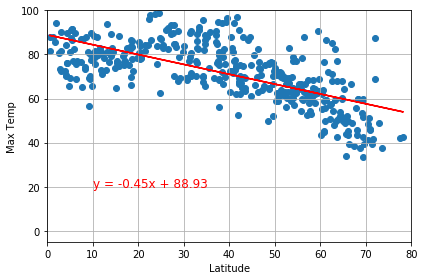

In [97]:
x_values = nhemis_df["Lat"]
y_values = nhemis_df["Max Temp"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title='North Hemis Latitude vs Max Temp'
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.ylim(-5, 100)
plt.xlim(0, 80)

plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("../Images/nhemis_lat_maxtemp_regression.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

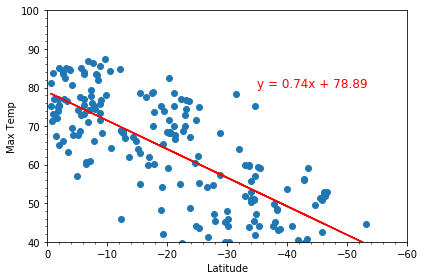

In [100]:
x_values = shemis_df["Lat"]
y_values = shemis_df["Max Temp"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title='South Hemis Latitude vs Max Temp'
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.tight_layout()
plt.savefig("../Images/shemis_lat_maxtemp_regression.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

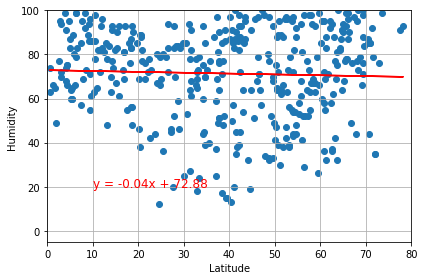

In [87]:
x_values = nhemis_df["Lat"]
y_values = nhemis_df["Humidity"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(-5, 100)
plt.xlim(0, 80)

plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("../Images/nhemis_lat_Humidity_regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

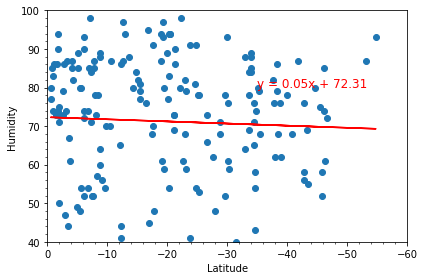

In [88]:
x_values = shemis_df["Lat"]
y_values = shemis_df["Humidity"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.tight_layout()
plt.savefig("../Images/shemis_lat_humidity_regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

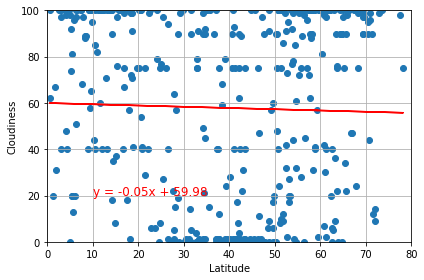

In [169]:
x_values = nhemis_df["Lat"]
y_values = nhemis_df["Cloudiness"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(0, 100)
plt.xlim(0, 80)

plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("../Images/nhemis_lat_Cloudiness_regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

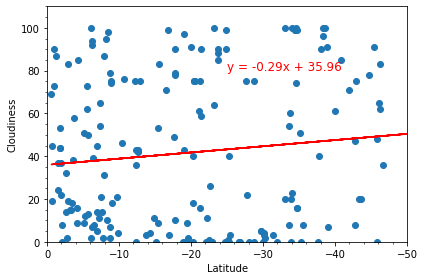

In [168]:
x_values = shemis_df["Lat"]
y_values = shemis_df["Cloudiness"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(0, 110)
plt.xlim(0, -50)
plt.minorticks_on()
plt.tight_layout()
plt.savefig("../Images/shemis_lat_Cloudiness_regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

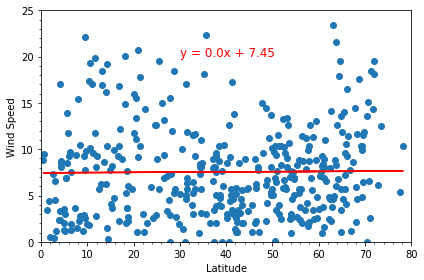

In [164]:
x_values = nhemis_df["Lat"]
y_values = nhemis_df["Wind Speed"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
# plt.title('Noth Hemisphere Lateral vs Wind Speed Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0, 25)
plt.xlim(0, 80)
plt.minorticks_on()
plt.tight_layout()
plt.savefig("../Images/nhemis_lat_WindSpeed_regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

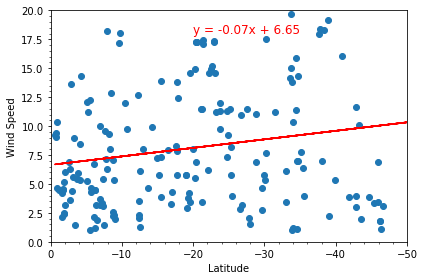

In [167]:
x_values = shemis_df["Lat"]
y_values = shemis_df["Wind Speed"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
# plt.title('South Hemisphere Lateral vs Wind Speed Regression')
# plt.title("Name")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,18),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0, 20)
plt.xlim(0, -50)
plt.minorticks_on()
plt.tight_layout()
plt.savefig("../Images/shemis_lat_WindSpeed_regression.png")
plt.show()